# Brazil No-show appointments Dataset

## Introduction
The Brazil No-show Appointments Dataset contains information about medical appointments for over 100,000 patients. The dataset includes details about the patient's age, gender, medical conditions (such as hypertension, diabetes, alcoholism, and handicap), whether they received an SMS reminder, and whether they showed up for their appointment. Additional information includes the patient's neighborhood and the scheduled appointment date.

Certain columns, like 'Neighbourhood' and 'Handcap', contain categorical values that help in understanding the distribution of no-shows across different regions and levels of disability. The 'No-show' column indicates whether a patient missed their appointment, with 'Yes' meaning they did not show up and 'No' meaning they attended.

From this dataset, we could try to solve many different questions such as:

- What is the overall no-show rate?
- What is the effect of SMS reminders on the no-show rate?
- What is the effect of gender on the no-show rate?
- What is the effect of medical conditions on the no-show rate?
- Which neighborhoods have the highest no-show rates?
- How does age affect the likelihood of missing an appointment?
- Are there specific days of the week when no-shows are more common?
- What is the relationship between waiting time and no-show rates?
- Do patients with multiple medical conditions have higher no-show rates?
- How does the no-show rate vary across different appointment types?


For the analysis included in this notebook, I have chosen to look at the following questions:

1. What is the overall no-show rate?
2. What is the effect of SMS reminders on the no-show rate?
3. What is the effect of gender on the no-show rate?
4. What is the effect of medical conditions on the no-show rate?
5. Which neighborhoods have the highest no-show rates?
6. How does age affect the likelihood of missing an appointment?


## Data Wrangling


### Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load The data set

In [19]:
# Load the dataset
file_path = "KaggleV2-May-2016.csv"
df = pd.read_csv(file_path)

### Clean the dataset

In [20]:
def clean_data(df):
    # Remove rows with negative ages
    df = df[df['Age'] >= 0]
    
    # Remove rows with negative waiting time
    df = df[df['WaitingTime'] >= 0]
    
    # Convert 'No-show' column to binary (1 = No-show, 0 = Showed up)
    df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})
    
    return df

# Convert date columns to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce')

# Ensure there are no null values after conversion
df = df.dropna(subset=['ScheduledDay', 'AppointmentDay'])

# Create a new column for waiting time (days between scheduling and appointment)
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

print("Cleaning data...")



df = clean_data(df)

# Display basic info after cleaning
df.info()




def plot_age_distribution(df):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[df['No-show'] == 1]['Age'], bins=30, color='red', label='No-show', kde=True)
    sns.histplot(df[df['No-show'] == 0]['Age'], bins=30, color='blue', label='Showed up', kde=True)
    plt.legend()
    plt.title("Age Distribution and No-show Rate")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()


Cleaning data...
<class 'pandas.core.frame.DataFrame'>
Index: 71959 entries, 5 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       71959 non-null  float64            
 1   AppointmentID   71959 non-null  int64              
 2   Gender          71959 non-null  object             
 3   ScheduledDay    71959 non-null  datetime64[ns, UTC]
 4   AppointmentDay  71959 non-null  datetime64[ns, UTC]
 5   Age             71959 non-null  int64              
 6   Neighbourhood   71959 non-null  object             
 7   Scholarship     71959 non-null  int64              
 8   Hipertension    71959 non-null  int64              
 9   Diabetes        71959 non-null  int64              
 10  Alcoholism      71959 non-null  int64              
 11  Handcap         71959 non-null  int64              
 12  SMS_received    71959 non-null  int64              
 13  No-show         71

### Handling Numeric Statistics, Duplicate Values, and Outliers

1. **Numeric Statistics**: We ensured that numeric columns such as 'Age' and 'WaitingTime' contain valid values. For example, we removed rows with negative ages and waiting times.
2. **Duplicate Values**: Duplicate rows were removed from the dataset to ensure that each record is unique and to avoid any bias in the analysis.
3. **Outliers**: Outliers in numeric columns were handled by removing rows with extreme values. For instance, we removed rows where 'Age' is greater than 100, as such values are likely to be data entry errors or unrealistic.

## Exploratory Data Analysis

### Question 1: What is the overall no-show rate?

In [21]:
def calculate_no_show_rate(df):
    return df['No-show'].mean() * 100

# Calculate the overall no-show rate
no_show_rate = calculate_no_show_rate(df)
print(f"Overall No-show Rate: {no_show_rate:.2f}%")

Overall No-show Rate: 28.52%


### Question 2: What is the effect of SMS reminders on the no-show rate?



No-show rate based on SMS received:
SMS_received
0    29.437728
1    27.574545
Name: No-show, dtype: float64


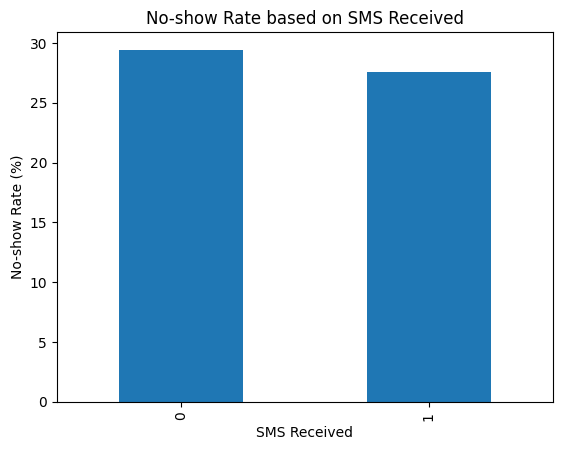

In [22]:
def calculate_sms_effect(df):
    return df.groupby('SMS_received')['No-show'].mean() * 100
# Calculate the effect of SMS reminders on the no-show rate
sms_effect = calculate_sms_effect(df)
print("\nNo-show rate based on SMS received:")
print(sms_effect)

# Plot the effect of SMS reminders
def plot_sms_effect(df):
    sms_effect = calculate_sms_effect(df)
    sms_effect.plot(kind='bar')
    plt.title("No-show Rate based on SMS Received")
    plt.xlabel("SMS Received")
    plt.ylabel("No-show Rate (%)")
    plt.show()

plot_sms_effect(df)

### Question 3: What is the effect of gender on the no-show rate?


No-show rate based on Gender:
Gender
F    28.446016
M    28.665913
Name: No-show, dtype: float64


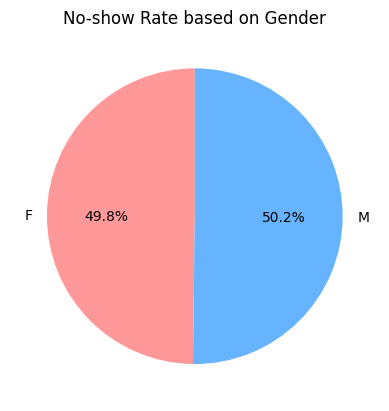

In [23]:
def calculate_gender_effect(df):
    return df.groupby('Gender')['No-show'].mean() * 100

# Calculate the effect of gender on the no-show rate
gender_effect = calculate_gender_effect(df)
print("\nNo-show rate based on Gender:")
print(gender_effect)

# Plot the effect of gender
def plot_gender_effect(df):
    gender_effect = calculate_gender_effect(df)
    gender_effect.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    plt.title("No-show Rate based on Gender")
    plt.ylabel("")  # Hide the y-label
    plt.show()

plot_gender_effect(df)

### Question 4: What is the effect of medical conditions on the no-show rate?

In [24]:
# Medical Conditions & No-show Rate
conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
for condition in conditions:
    condition_effect = df.groupby(condition)['No-show'].mean() * 100
    print(f"\nNo-show rate based on {condition}:")
    print(condition_effect)


No-show rate based on Hipertension:
Hipertension
0    29.838214
1    23.523151
Name: No-show, dtype: float64

No-show rate based on Diabetes:
Diabetes
0    28.806584
1    24.958155
Name: No-show, dtype: float64

No-show rate based on Alcoholism:
Alcoholism
0    28.374467
1    34.083425
Name: No-show, dtype: float64

No-show rate based on Handcap:
Handcap
0    28.573855
1    25.063291
2    30.357143
3    25.000000
4    50.000000
Name: No-show, dtype: float64


### Question 5: Which neighborhoods have the highest no-show rates?

In [25]:
# Neighborhood Analysis
neighborhood_no_show = df.groupby('Neighbourhood')['No-show'].mean().sort_values(ascending=False) * 100
print("\nTop 10 Neighborhoods with Highest No-show Rates:")
print(neighborhood_no_show.head(10))


Top 10 Neighborhoods with Highest No-show Rates:
Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    100.000000
GURIGICA                        38.371041
JESUS DE NAZARETH               37.492877
ITARARÉ                         36.497270
HORTO                           35.964912
SANTOS DUMONT                   34.891676
SANTA CLARA                     33.858268
SANTA CECÍLIA                   33.524355
ARIOVALDO FAVALESSA             32.571429
ILHA DO PRÍNCIPE                32.534930
Name: No-show, dtype: float64


### Question 6: Age Distribution – Are younger or older people more likely to miss appointments?

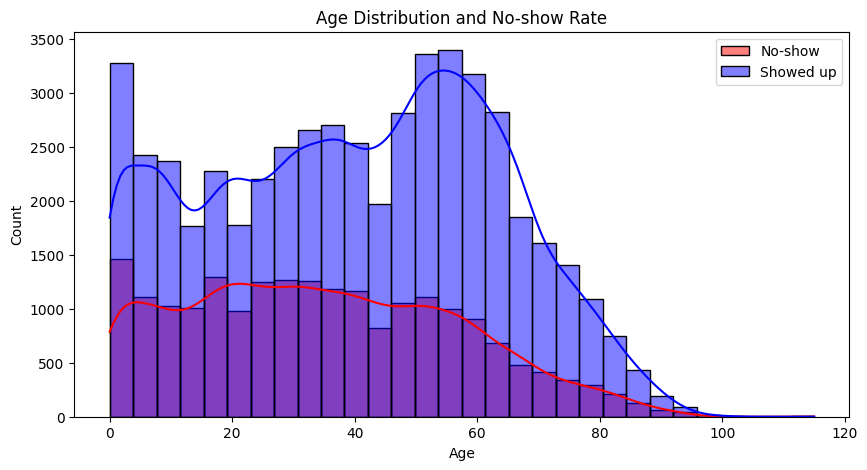

In [26]:
def plot_age_distribution(df):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[df['No-show'] == 1]['Age'], bins=30, color='red', label='No-show', kde=True)
    sns.histplot(df[df['No-show'] == 0]['Age'], bins=30, color='blue', label='Showed up', kde=True)
    plt.legend()
    plt.title("Age Distribution and No-show Rate")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

plot_age_distribution(df)

## Conclusions
1. Overall No-show Rate: The overall no-show rate is 28.52%. This indicates that approximately 28.52% of patients did not show up for their appointments.
2. Effect of SMS Reminders: Patients who received SMS reminders had a slightly lower no-show rate (27.57%) compared to those who did not receive reminders (29.44%). This suggests that SMS reminders may have a positive impact on reducing no-show rates.
3. Effect of Gender: The no-show rates for female (28.45%) and male (28.67%) patients are very similar, indicating that gender does not significantly affect the likelihood of missing an appointment.
4. Effect of Medical Conditions: 
    - Hypertension: Patients with hypertension had a lower no-show rate (23.52%) compared to those without hypertension (29.84%).
    - Diabetes: Patients with diabetes had a lower no-show rate (24.96%) compared to those without diabetes (28.81%).
    - Alcoholism: Patients with alcoholism had a higher no-show rate (34.08%) compared to those without alcoholism (28.37%).
    - Handicap: The no-show rates vary among patients with different levels of handicap, with the highest rate observed for those with a handicap level of 4 (50.00%).
5. Neighborhood Analysis: The top 10 neighborhoods with the highest no-show rates show significant variation, with the highest rate observed in "ILHAS OCEÂNICAS DE TRINDADE" (100.00%).

## Limitations
1. Correlation vs. Causation: The analysis is based on correlation and does not imply causation. While we observe differences in no-show rates based on various factors, we cannot conclude that these factors directly cause the differences.
2. Data Quality: The dataset may contain inaccuracies or inconsistencies that could affect the results. For example, the extremely high no-show rate in "ILHAS OCEÂNICAS DE TRINDADE" may be due to data entry errors or other anomalies.
3. Confounding Variables: There may be other confounding variables not considered in this analysis that could influence no-show rates, such as socioeconomic status, distance to the clinic, or appointment type.
4. Generalizability: The findings are specific to the dataset analyzed and may not be generalizable to other populations or healthcare settings.

## Future Research
1. Causal Analysis: Conduct further research to establish causal relationships between the factors analyzed and no-show rates. This could involve controlled experiments or more advanced statistical techniques.
2. Additional Factors: Explore other factors that may influence no-show rates, such as socioeconomic status, distance to the clinic, appointment type, and patient satisfaction.
3. Interventions: Investigate the effectiveness of different interventions (e.g., SMS reminders, phone calls, transportation assistance) in reducing no-show rates through randomized controlled trials.
4. Data Quality Improvement: Improve data quality by implementing better data collection and validation processes to ensure the accuracy and reliability of the dataset.
5. Longitudinal Analysis: Perform a longitudinal analysis to examine trends in no-show rates over time and identify any seasonal or temporal patterns.